In [4]:
from binance.client import Client
import pandas as pd
import numpy as np
from datetime import datetime
import userbinance
import talib
import matplotlib.pyplot as plt

In [5]:
client = Client(userbinance.API_KEY, userbinance.API_SECRET, tld='com')

In [6]:
symbolticker = 'ETHUSDT'

In [7]:
klines = client.get_historical_klines(symbolticker, Client.KLINE_INTERVAL_4HOUR, "1 week ago UTC")
df = pd.DataFrame(klines)

In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1696392000000,1641.85000000,1644.77000000,1636.06000000,1644.77000000,21212.05590000,1696406399999,34787094.77308700,63919,9170.53700000,15039847.69942600,0
1,1696406400000,1644.77000000,1652.57000000,1643.65000000,1646.60000000,22425.08780000,1696420799999,36948573.46713800,72874,10461.33980000,17237524.89184800,0
2,1696420800000,1646.60000000,1650.28000000,1627.39000000,1632.63000000,45506.91220000,1696435199999,74550203.08843300,116710,21959.38050000,35976919.82005600,0
3,1696435200000,1632.64000000,1654.81000000,1631.70000000,1643.01000000,48215.38380000,1696449599999,79265369.55860700,110830,23143.67800000,38050101.14126200,0
4,1696449600000,1643.02000000,1652.79000000,1640.60000000,1646.58000000,22499.86530000,1696463999999,37052072.64450800,64856,12039.15670000,19826860.04001300,0


In [9]:
df_temp = df

In [10]:
df_temp = df_temp[[0,1,2,3,4,5]]
df_temp.head()

,0,1,2,3,4,5
0,1696392000000,1641.85000000,1644.77000000,1636.06000000,1644.77000000,21212.05590000
1,1696406400000,1644.77000000,1652.57000000,1643.65000000,1646.60000000,22425.08780000
2,1696420800000,1646.60000000,1650.28000000,1627.39000000,1632.63000000,45506.91220000
3,1696435200000,1632.64000000,1654.81000000,1631.70000000,1643.01000000,48215.38380000
4,1696449600000,1643.02000000,1652.79000000,1640.60000000,1646.58000000,22499.86530000


In [12]:
df_temp.rename(columns={0: 'Date',1:'Open',2:'High',3:'Low',4:'Close',5:'Volume'}, inplace=True)

C:\Users\Guille\AppData\Local\Temp\ipykernel_38740\354983717.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.rename(columns={0: 'Date',1:'Open',2:'High',3:'Low',4:'Close',5:'Volume'}, inplace=True)


In [13]:
df_temp.head()

,Date,Open,High,Low,Close,Volume
0,1696392000000,1641.85000000,1644.77000000,1636.06000000,1644.77000000,21212.05590000
1,1696406400000,1644.77000000,1652.57000000,1643.65000000,1646.60000000,22425.08780000
2,1696420800000,1646.60000000,1650.28000000,1627.39000000,1632.63000000,45506.91220000
3,1696435200000,1632.64000000,1654.81000000,1631.70000000,1643.01000000,48215.38380000
4,1696449600000,1643.02000000,1652.79000000,1640.60000000,1646.58000000,22499.86530000


In [14]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    42 non-null     int64 
 1   Open    42 non-null     object
 2   High    42 non-null     object
 3   Low     42 non-null     object
 4   Close   42 non-null     object
 5   Volume  42 non-null     object
dtypes: int64(1), object(5)
memory usage: 2.1+ KB


In [15]:
df_temp['Date'] = df_temp['Date'].apply(lambda x: datetime.fromtimestamp(x/1000))
df_temp.head()

C:\Users\Guille\AppData\Local\Temp\ipykernel_38740\2086835934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['Date'] = df_temp['Date'].apply(lambda x: datetime.fromtimestamp(x/1000))


,Date,Open,High,Low,Close,Volume
0,2023-10-04 01:00:00,1641.85000000,1644.77000000,1636.06000000,1644.77000000,21212.05590000
1,2023-10-04 05:00:00,1644.77000000,1652.57000000,1643.65000000,1646.60000000,22425.08780000
2,2023-10-04 09:00:00,1646.60000000,1650.28000000,1627.39000000,1632.63000000,45506.91220000
3,2023-10-04 13:00:00,1632.64000000,1654.81000000,1631.70000000,1643.01000000,48215.38380000
4,2023-10-04 17:00:00,1643.02000000,1652.79000000,1640.60000000,1646.58000000,22499.86530000


In [16]:
columnas_a_convertir = ['Open','High','Low','Close','Volume']
df_temp[columnas_a_convertir] = df_temp[columnas_a_convertir].astype(float).round(4)
df_temp.head()

C:\Users\Guille\AppData\Local\Temp\ipykernel_38740\515939337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[columnas_a_convertir] = df_temp[columnas_a_convertir].astype(float).round(4)


,Date,Open,High,Low,Close,Volume
0,2023-10-04 01:00:00,1641.85,1644.77,1636.06,1644.77,21212.0559
1,2023-10-04 05:00:00,1644.77,1652.57,1643.65,1646.60,22425.0878
2,2023-10-04 09:00:00,1646.60,1650.28,1627.39,1632.63,45506.9122
3,2023-10-04 13:00:00,1632.64,1654.81,1631.70,1643.01,48215.3838
4,2023-10-04 17:00:00,1643.02,1652.79,1640.60,1646.58,22499.8653


In [17]:
df_temp['RSI'] = talib.RSI(df_temp['Close'].values, timeperiod=14)
df_temp['EMA20'] = talib.EMA(df_temp['Close'].values, timeperiod=20)
df_temp['EMA40'] = talib.EMA(df_temp['Close'].values, timeperiod=40)
df_temp['EMA60'] = talib.EMA(df_temp['Close'].values, timeperiod=60)
df_temp['fastk'], df_temp['fastd'] = talib.STOCHRSI(df_temp['Close'].values, timeperiod=14)
df_temp['macd_line'], df_temp['signal_line'], _ = talib.MACD(df_temp['Close'])
df_temp['upper'], df_temp['middle'],df_temp['lower'] = talib.BBANDS(df_temp['Close'], timeperiod=5)
adx_values = talib.ADX(df_temp['High'], df_temp['Low'], df_temp['Close'], timeperiod=14)

C:\Users\Guille\AppData\Local\Temp\ipykernel_38740\1260747756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['RSI'] = talib.RSI(df_temp['Close'].values, timeperiod=14)
C:\Users\Guille\AppData\Local\Temp\ipykernel_38740\1260747756.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['EMA20'] = talib.EMA(df_temp['Close'].values, timeperiod=20)
C:\Users\Guille\AppData\Local\Temp\ipykernel_38740\1260747756.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [18]:
df_temp.head()

,Date,Open,High,Low,Close,Volume,RSI,EMA20,EMA40,EMA60,fastk,fastd,macd_line,signal_line,upper,middle,lower
0,2023-10-04 01:00:00,1641.85,1644.77,1636.06,1644.77,21212.0559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-10-04 05:00:00,1644.77,1652.57,1643.65,1646.60,22425.0878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-10-04 09:00:00,1646.60,1650.28,1627.39,1632.63,45506.9122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-10-04 13:00:00,1632.64,1654.81,1631.70,1643.01,48215.3838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-10-04 17:00:00,1643.02,1652.79,1640.60,1646.58,22499.8653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1653.15059,1642.718,1632.28541


In [19]:
df_temp = df_temp.iloc[59::]
df_temp.reset_index(drop=True, inplace=True)
df_temp.head()

,Date,Open,High,Low,Close,Volume,RSI,EMA20,EMA40,EMA60,fastk,fastd,macd_line,signal_line,upper,middle,lower


In [16]:
df_temp.to_pickle('./Datasets/df_ETHUSDT_4h_eval.pickle')

***

In [40]:
# Cargar datos
df_temp = pd.read_pickle('./Datasets/df_ETHUSDT_4h.pickle')

In [41]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6511 entries, 0 to 6510
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         6511 non-null   datetime64[ns]
 1   Open         6511 non-null   float64       
 2   High         6511 non-null   float64       
 3   Low          6511 non-null   float64       
 4   Close        6511 non-null   float64       
 5   Volume       6511 non-null   float64       
 6   RSI          6511 non-null   float64       
 7   EMA20        6511 non-null   float64       
 8   EMA40        6511 non-null   float64       
 9   EMA60        6511 non-null   float64       
 10  fastk        6511 non-null   float64       
 11  fastd        6511 non-null   float64       
 12  macd_line    6511 non-null   float64       
 13  signal_line  6511 non-null   float64       
 14  upper        6511 non-null   float64       
 15  middle       6511 non-null   float64       
 16  lower 

In [43]:
df_temp[df_temp.columns[1::]]

,Open,High,Low,Close,Volume,RSI,EMA20,EMA40,EMA60,fastk,fastd,macd_line,signal_line,upper,middle,lower
0,375.66,376.85,374.81,375.74,41634.6019,57.566743,371.915841,371.948304,372.790333,100.000000,94.322544,-0.199425,-1.094532,378.707663,373.312,367.916337
1,375.72,378.64,374.98,378.11,45734.8910,61.067141,372.505761,372.248875,372.964749,100.000000,100.000000,0.317210,-0.812184,378.879214,375.254,371.628786
2,378.12,380.00,372.50,373.00,93611.4211,51.250433,372.552832,372.285515,372.965904,0.000000,66.666667,0.310730,-0.587601,379.026793,375.062,371.097207
3,372.97,375.72,372.73,375.03,57683.7913,54.387353,372.788752,372.419392,373.033580,31.954903,43.984968,0.464050,-0.377271,378.785173,375.514,372.242827
4,375.02,377.71,374.28,375.75,63807.0544,55.481546,373.070776,372.581861,373.122643,43.101133,25.018679,0.636320,-0.174553,378.800107,375.526,372.251893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6506,1633.56,1641.40,1633.56,1639.00,17982.4757,48.612145,1638.883037,1643.275623,1642.990580,100.000000,48.767462,-3.971650,-5.366644,1642.874560,1636.076,1629.277440
6507,1639.00,1639.85,1625.00,1628.88,25190.3573,42.790966,1637.930367,1642.573398,1642.527938,0.616030,48.972805,-4.310250,-5.155365,1642.298967,1634.118,1625.937033
6508,1628.88,1629.59,1616.17,1617.84,31891.0729,37.513484,1636.016999,1641.366891,1641.718498,0.000000,33.538677,-5.407099,-5.205712,1643.924767,1629.976,1616.027233
6509,1617.85,1637.45,1617.19,1631.20,35954.4182,46.166189,1635.558237,1640.870945,1641.373629,77.961701,26.192577,-5.139079,-5.192385,1644.076752,1630.098,1616.119248


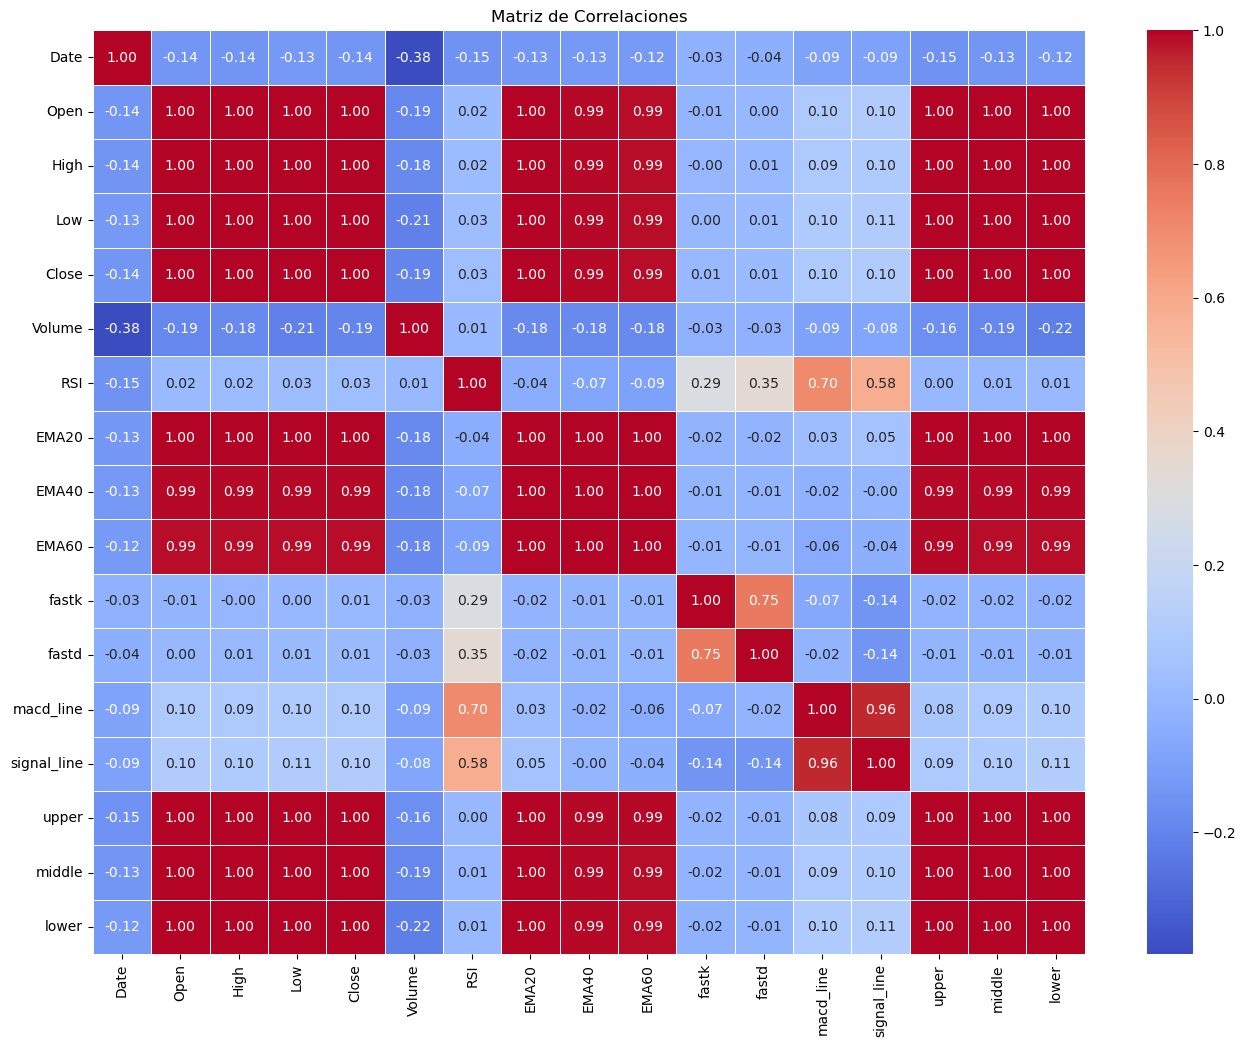

In [38]:
# Calcular la matriz de correlaciones
correlation_matrix = df_temp.corr()

# Crear el gráfico de matriz de correlaciones (heatmap)
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlaciones')
plt.show()

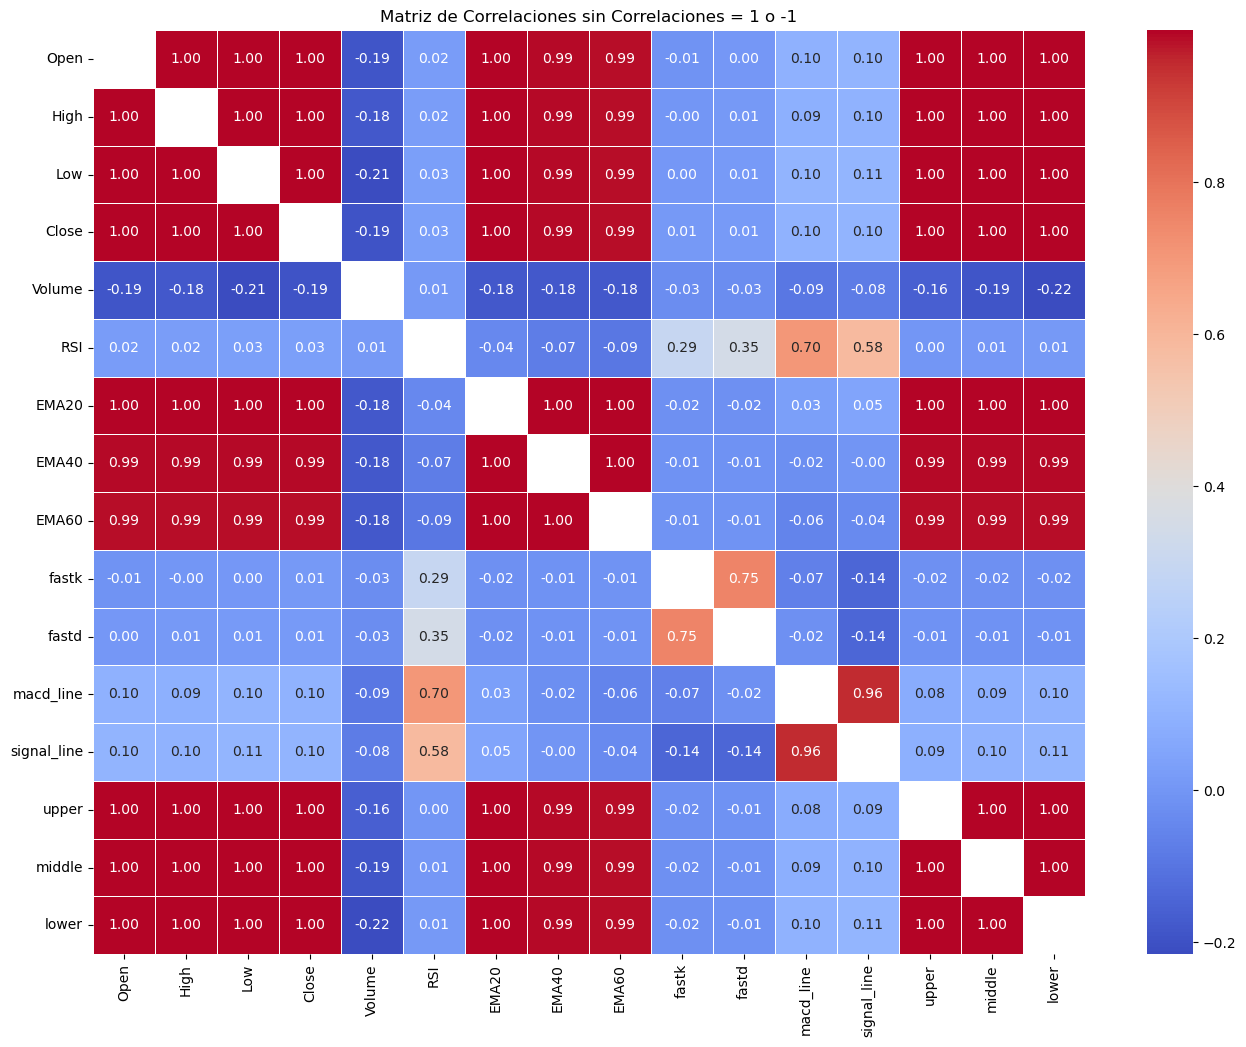

In [39]:
df_temp.drop('Date',axis=1,inplace=True)
correlation_matrix = df_temp.corr()

# Eliminar correlaciones iguales a 1 o -1
correlation_matrix = correlation_matrix.mask(np.isclose(correlation_matrix, 1) | np.isclose(correlation_matrix, -1))

# Crear el gráfico de matriz de correlaciones (heatmap)
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlaciones sin Correlaciones = 1 o -1')
plt.show()